# Lab Activity 17-12-2019 - Simulation of lab exam

Find the clusters in the included dataset.

The solution must be produced as a Python Notebook. The notebook must include
appropriate comments and must produce:
1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)
2. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if
any (2pt)
3. a clustering schema using a method of your choice exploring a range of parameter
values (5pt)
4. the plot of the global inertia (SSD) and silhouette index for the parameter values you
examine (4pt)
5. the optimal parameters of your choice (4pt)
6. a pairplot of the data using as hue the cluster assignment with the optimal parameter
(3pt)
7. a plot of the silhouette index for the data points, grouped according to the clusters
(4pt)
8. A sorted list of the discovered clusters for decreasing sizes (7pt)

## 1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

random_state=234
np.random.seed(random_state)

X = pd.read_csv('./lab_exercise.csv', header=None)

X.head()

,0,1,2,3
0,0.548814,-4.893751,0.365316,0.715189
1,0.602763,-0.387057,1.164867,0.544883
2,0.423655,-10.844898,-7.553523,0.645894
3,0.437587,1.975564,-1.274422,0.891773
4,0.963663,-4.054276,0.064053,0.383442


<Axes: >

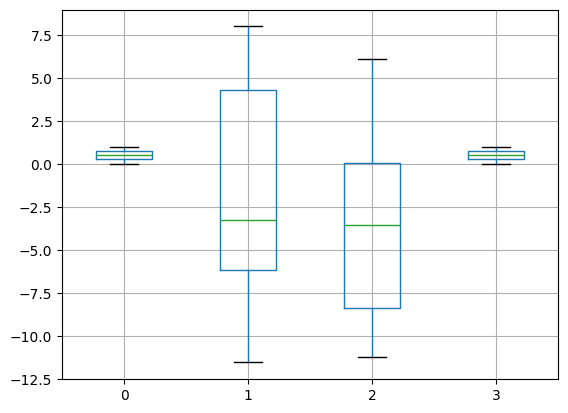

In [2]:
X.boxplot()

The boxplots show that there are no outliers, the distribution of 0 and 3 is very similar. 1 and
2 have a similar median value but different distribution of values. There doesn’t seem to be any
particular situaion showing

## 2. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (2pt)

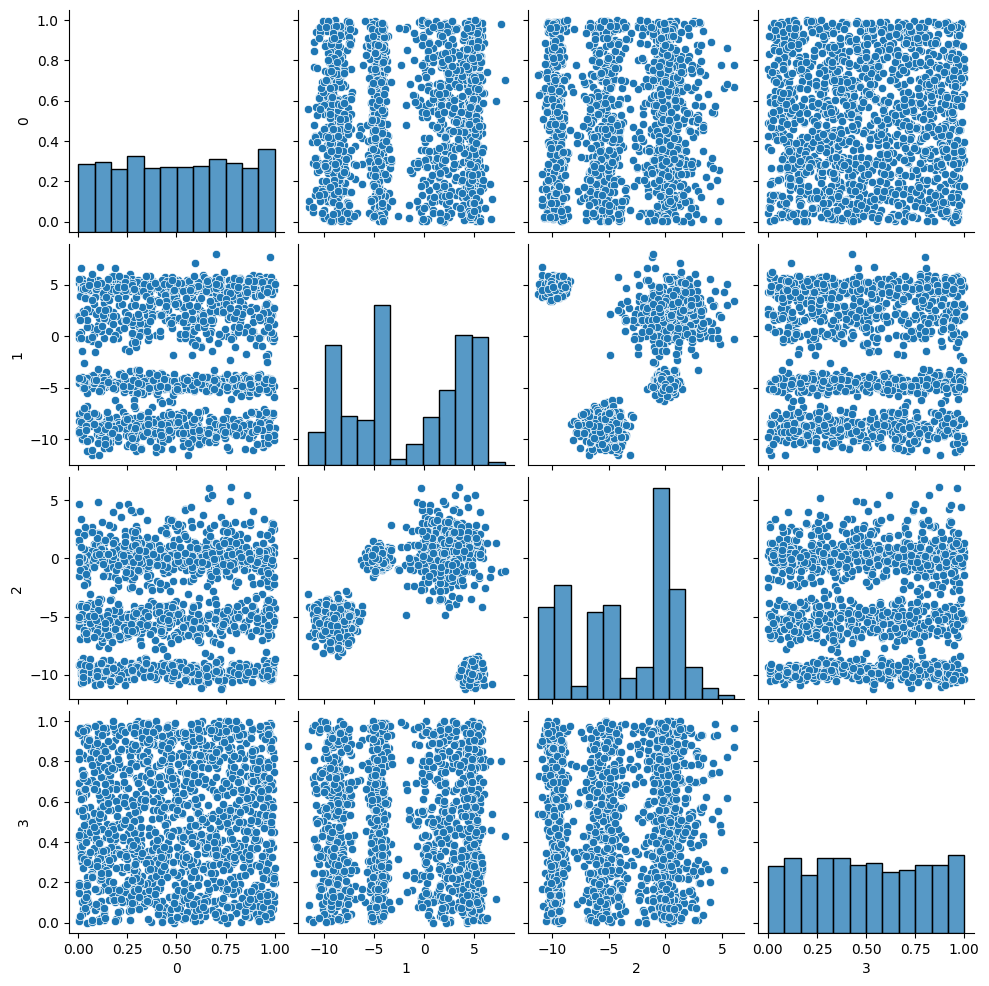

In [3]:
sns.pairplot(X)

it seems that columns 1 & 2 may be more suitable for clustering than columns 3 & 4 as shown in the pairplot representation

## 3. a clustering schema using a method of your choice exploring a range of parameter values (5pt)

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import ParameterGrid

k_means_res = {}
krange = range(2, 11)

for k in krange:
    km = KMeans(n_clusters=k, init='k-means++', random_state=random_state)
    labels = km.fit_predict(X)
    s_score = silhouette_score(X, labels)
    print(f"inertia: {km.inertia_}, silhoutte: {s_score}")

    k_means_res[f"k={k}"] = {
        "k": k,
        "inertia": km.inertia_,
        "silhouette_score": s_score,
        "estimator": km
    }

k_means_res

inertia: 34518.446072307, silhoutte: 0.5625116643806214
inertia: 12386.974561829846, silhoutte: 0.6570294594839332
inertia: 3985.529375309875, silhoutte: 0.7364727220808959
inertia: 3140.1977856248295, silhoutte: 0.6829903796702864
inertia: 2568.400002588267, silhoutte: 0.687951931618135
inertia: 2313.7872893329495, silhoutte: 0.6733907948077242
inertia: 2109.3277390677367, silhoutte: 0.559355491883933
inertia: 2052.4413452730537, silhoutte: 0.3905527294771334
inertia: 1888.3772208120772, silhoutte: 0.39110578451162337


{'k=2': {'k': 2,
  'inertia': 34518.446072307,
  'silhouette_score': np.float64(0.5625116643806214),
  'estimator': KMeans(n_clusters=2, random_state=234)},
 'k=3': {'k': 3,
  'inertia': 12386.974561829846,
  'silhouette_score': np.float64(0.6570294594839332),
  'estimator': KMeans(n_clusters=3, random_state=234)},
 'k=4': {'k': 4,
  'inertia': 3985.529375309875,
  'silhouette_score': np.float64(0.7364727220808959),
  'estimator': KMeans(n_clusters=4, random_state=234)},
 'k=5': {'k': 5,
  'inertia': 3140.1977856248295,
  'silhouette_score': np.float64(0.6829903796702864),
  'estimator': KMeans(n_clusters=5, random_state=234)},
 'k=6': {'k': 6,
  'inertia': 2568.400002588267,
  'silhouette_score': np.float64(0.687951931618135),
  'estimator': KMeans(n_clusters=6, random_state=234)},
 'k=7': {'k': 7,
  'inertia': 2313.7872893329495,
  'silhouette_score': np.float64(0.6733907948077242),
  'estimator': KMeans(n_clusters=7, random_state=234)},
 'k=8': {'k': 8,
  'inertia': 2109.32773906773

## 4. the plot of the global inertia (SSD) and silhouette index for the parameter values you examine (4pt)

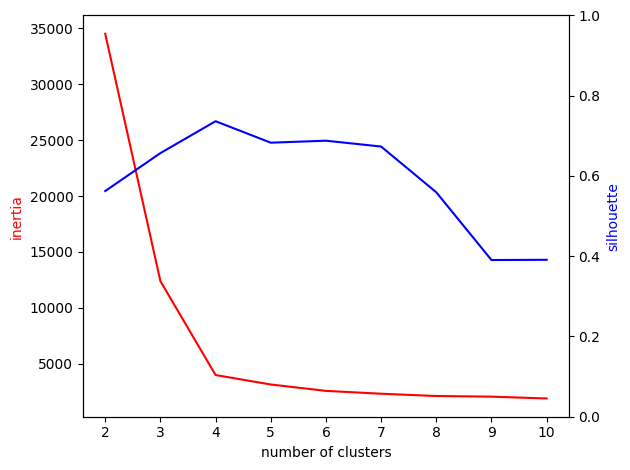

In [25]:
inertia = [val['inertia'] for val in k_means_res.values()]
silhouette = [val['silhouette_score'] for val in k_means_res.values()]

fig, ax1 = plt.subplots()
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('inertia', color='red')
ax1.plot(krange, inertia, color='red')

ax2 = ax1.twinx()
ax2.set_ylabel('silhouette', color='blue')
ax2.plot(krange, silhouette, color='blue')
ax2.set_ylim(0, 1)

fig.tight_layout()

## 5. the optimal parameters of your choice (4pt)

In [27]:
best_k = 4

we're choosing k=4 because by looking at the inertia, it does not change much after the 4 k. the silhoutte score first 'elbow' point is also in the proximity of the 4 k.
we were expecting this result also by looking at the initial pairplot representation of the data

## 6. a pairplot of the data using as hue the cluster assignment with the optimal parameter (3pt)

In [35]:
km = k_means_res["k=4"]['estimator']

y_km = km.predict(X)
X_pred = X.assign(pred_class=y_km)

X_pred.head()

,0,1,2,3,pred_class
0,0.548814,-4.893751,0.365316,0.715189,3
1,0.602763,-0.387057,1.164867,0.544883,0
2,0.423655,-10.844898,-7.553523,0.645894,2
3,0.437587,1.975564,-1.274422,0.891773,0
4,0.963663,-4.054276,0.064053,0.383442,3


we assign the predicted labels by the model to the original dataframe

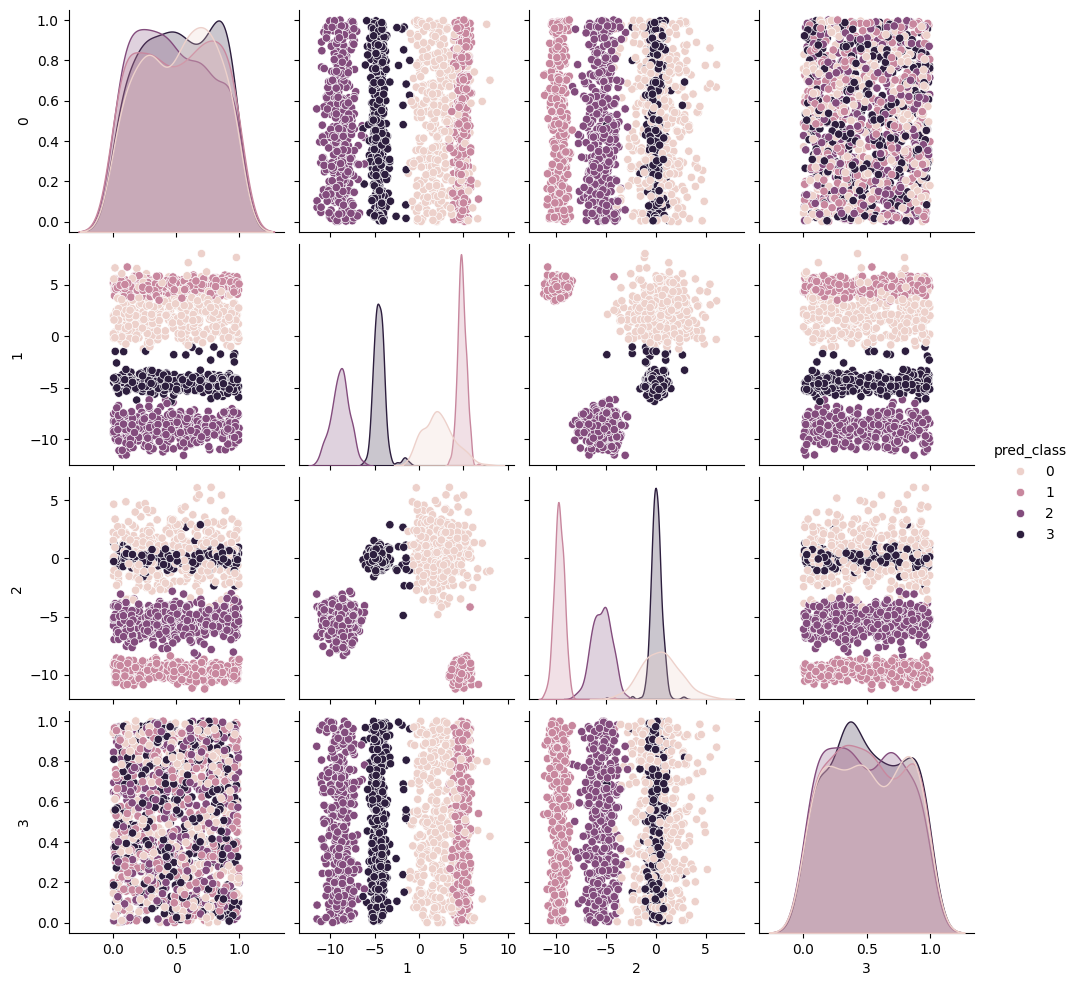

In [36]:
sns.pairplot(X_pred, hue='pred_class')

## 7. a plot of the silhouette index for the data points, grouped according to the clusters (4pt)

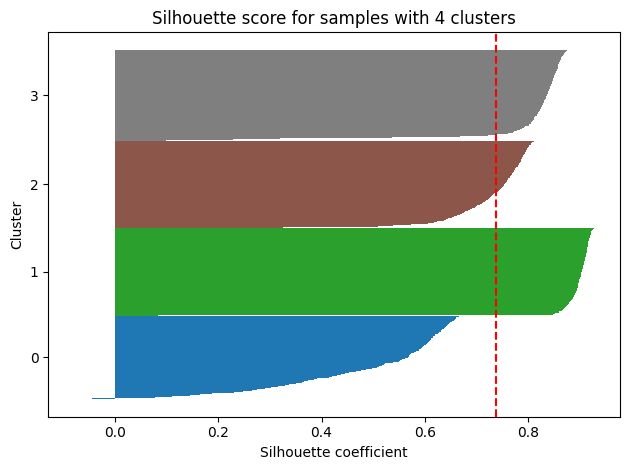

In [41]:
from plot_silhouette import plot_silhouette

silhouette_score_samples = silhouette_samples(X, y_km, metric='euclidean')
plt.title(f"Silhouette score for samples with {best_k} clusters")
plot_silhouette(silhouette_score_samples, y_km)

## 8. A sorted list of the discovered clusters for decreasing sizes (7pt)

In [43]:
occurrences = np.bincount(y_km)

occurrences

array([359, 376, 375, 390])

bincount created an array that contains as index the cluster numbers, as value, the elements in that cluster. We can then create tuples to have this association in an explicit way

In [57]:
tuples = [(qty, idx) for idx, qty in enumerate(occurrences)]

tuples

[(np.int64(359), 0),
 (np.int64(376), 1),
 (np.int64(375), 2),
 (np.int64(390), 3)]

In [58]:
tuples.sort(key=lambda x: x[0], reverse=True)

tuples

[(np.int64(390), 3),
 (np.int64(376), 1),
 (np.int64(375), 2),
 (np.int64(359), 0)]

In [59]:
[cluster for qty, cluster in tuples]

[3, 1, 2, 0]